MD. Tanvir Jawad <br>ID: 21101221

In [1]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.1 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

In [4]:
import matplotlib.pyplot as plt
from pandas import Series
from scipy.integrate import solve_ivp

In [9]:
alpha = 0.02
beta = -0.0018  # Quadratic growth rate parameter

K = abs(alpha / beta)  # Carrying capacity based on the quadratic model


t_span = (0, 10)
initial_population = 1

def bacterial_growth(t, population):
    net_growth = alpha * population * (1 - population / K)
    return net_growth

initial_conditions = [initial_population]
solution = solve_ivp(bacterial_growth, t_span, initial_conditions, t_eval=range(11))
time_points = solution.t
population_values = solution.y[0]
bacterial_population = Series(population_values, index=time_points)

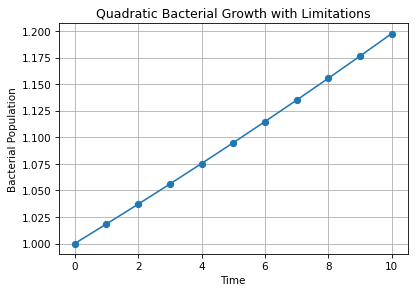

In [10]:
plt.plot(bacterial_population.index, bacterial_population.values, marker='o')
plt.xlabel('Time')
plt.ylabel('Bacterial Population')
plt.title('Quadratic Bacterial Growth with Limitations')
plt.grid(True)
plt.show()